# Machine Learning Pipeline: Data Preprocessing, Model Training, and Evaluation

Этот проект представляет полный пайплайн машинного обучения - от обработки данных до тренировки и оценки модели

### Ключевые этапы
- Выбор методов предобработки данных
- Преобразование и построение параметров
- Обучение разных моделей
- Оценка эффективности моделей и сравнение результатов

## Data preprocessing, model training and evaluation.

### 1. Reading the data
В данном проекте мы рассматриваем [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), который описывает задачу классификации машин на 4 класса

In [114]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-03-02 11:45:14--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.2’

car_data.csv.2      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2025-03-02 11:45:14 (4.26 MB/s) - ‘car_data.csv.2’ saved [58374/58374]



Изучим и преобразуем данный датасет ниже

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [116]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [117]:
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Используем методы `describe` и `info`, чтобы получить полезную информацию о нашем датасете

In [118]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [119]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


Так как пропусков в данных у нас нет, никак "искуственно" заполнять их не потребуется

### 2. Machine Learning pipeline
На данном этапе мы преобразуем данные. Посмотрим, необходимо ли изменить параметры для более быстрого и качественного обучения модели

#### 2.0. Data preprocessing

Посмотрим, как между собой коррелируют признаки. Для этого построим матрицу корреляции Спирмана

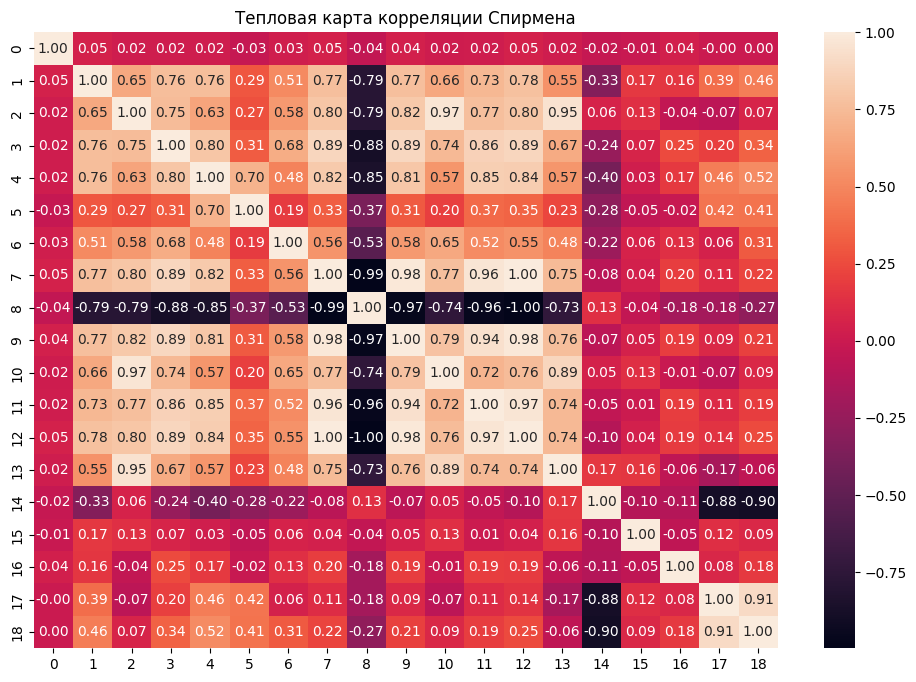

In [120]:
import seaborn as sns

spearman_corr = X_train_pd.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt='.2f')
plt.title("Тепловая карта корреляции Спирмена")
plt.show()

Как можно заметить, многие признаки коррелируют между собой. Удалим из датафрейма коррелирующие признаки(делаем это и для тренировочной, и для тестовой выборки)

[(2, 10), (2, 13), (3, 7), (3, 8), (3, 9), (3, 11), (3, 12), (4, 8), (7, 3), (7, 8), (7, 9), (7, 11), (7, 12), (8, 3), (8, 4), (8, 7), (8, 9), (8, 11), (8, 12), (9, 3), (9, 7), (9, 8), (9, 11), (9, 12), (10, 2), (10, 13), (11, 3), (11, 7), (11, 8), (11, 9), (11, 12), (12, 3), (12, 7), (12, 8), (12, 9), (12, 11), (13, 2), (13, 10), (14, 17), (14, 18), (17, 14), (17, 18), (18, 14), (18, 17)]


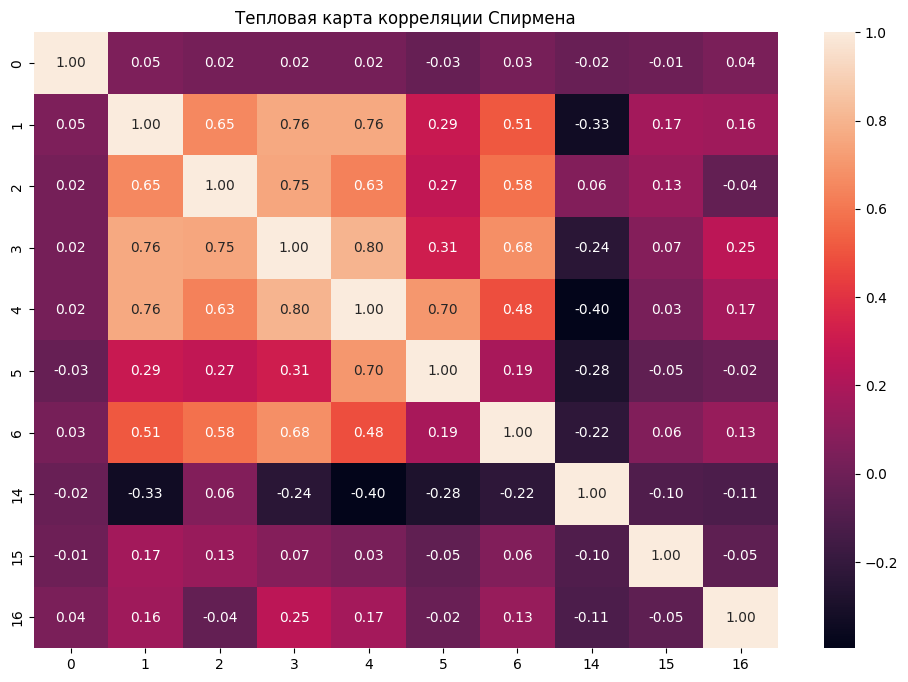

In [121]:
rows, cols = np.where((abs(spearman_corr) > 0.85) & (spearman_corr != 1))
print(list(zip(rows, cols)))

for i in range(len(rows)):
  if cols[i] in X_train_pd.columns and rows[i] in X_train_pd.columns:
    X_train_pd = X_train_pd.drop(cols[i], axis=1)
    X_test_pd = X_test_pd.drop(cols[i], axis=1)

spearman_corr = X_train_pd.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt='.2f')
plt.title("Тепловая карта корреляции Спирмена")
plt.show()

Теперь матрица корреляции Спирмана выглядит очень даже хорошо: сильно коррелирующих между собой признаков не наблюдается.

In [122]:
from sklearn.preprocessing import StandardScaler

Далее проведем стандартизацию данных(помогает более качественно обучить модель):

In [123]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_pd)
X_test_scaler = scaler.transform(X_test_pd)

X_train_scaler

array([[ 1.6370475 ,  0.18359802, -0.59777703, ..., -1.11325013,
        -0.506961  , -0.52651197],
       [ 0.24900796,  1.30078742,  2.00424153, ..., -0.02162375,
         0.89971851, -0.07326999],
       [-1.00683734, -0.31293061, -0.43515087, ..., -0.70389024,
        -0.506961  , -1.43299593],
       ...,
       [-0.64330317, -1.43012002,  0.05272761, ...,  1.07000264,
        -0.30600678, -1.43299593],
       [ 0.03832339, -1.05772355, -1.24828167, ..., -0.97679683,
        -0.70791521,  0.153351  ],
       [-1.33732294,  0.05946586, -0.43515087, ..., -0.43098364,
         1.50258115, -0.86644346]])

Посмотрим, сбалансирована ли наша выборка. Подсчитаем количество элементов каждого класса

In [124]:
y_test_pd = pd.DataFrame(y_test)
y_test_pd.value_counts()

,count
0,
bus,86
saab,84
van,67
opel,60


Вывод: Данные достаточно неплохо сбалансированы

#### 2.1. Basic logistic regression
* Найдем оптимальные гиперпараметры для модели логистической регрессии с использованием кросс-валидации на тренировочной выборке.

* Оценим качество модели с помощью метрик f1-score и accuracy
* Построим ROC-кривую для обученной модели Для этого воспользуемся библиотекой 'scikitplot' (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

In [126]:
logreg = LogisticRegression(multi_class='multinomial', tol=1e-4)

skf = StratifiedKFold(n_splits=10)

f1_scores = []
accuracy_scores = []
for train_index, test_index in skf.split(X_train, y_train):
    _X_train, _X_val = X_train_scaler[train_index], X_train_scaler[test_index]
    _y_train, _y_val = y_train[train_index], y_train[test_index]

    logreg.fit(_X_train, _y_train)
    predictions = logreg.predict(_X_val)

    accuracy = accuracy_score(_y_val, predictions)
    accuracy_scores.append(accuracy)
    f1 = f1_score(_y_val, predictions, average='macro')
    f1_scores.append(f1)

print(f'Средний accuracy_score: {np.mean(accuracy_scores)}')
print(f'Средний F1-score: {np.mean(f1_scores)}')


Средний accuracy_score: 0.6667003367003367
Средний F1-score: 0.6565952958314762


### Краткая информация по проверяемым решателям:

1. lbfgs (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)
Описание: Это алгоритм квазиньютоновского метода, который эффективно использует градиент и аппроксимацию матрицы Гессе для нахождения оптимума.

2. liblinear
Описание: Линейный алгоритм, использующий метод координатного спуска. Специально разработан для малых и средних задач.

3. saga (Stochastic Average Gradient Augmented)
Описание: Улучшенный вариант sag, который поддерживает L1 регуляризацию и является стохастическим методом оптимизации.

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
param_grid = [
    {'penalty':['l1','l2','elasticnet', None],
    'C' : np.logspace(-4,4,20),
    'solver' : ['lbfgs', 'liblinear','saga'],
    'max_iter'  : [1000],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}
]

In [129]:
clf = GridSearchCV(logreg, param_grid = param_grid, cv = 5, verbose=1, n_jobs=-1)
clf

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                          'max_iter': [1000],
                          'penalty': ['l1', 'l2', 'elasticnet', None],
                          'solver': ['lbfgs', 'liblinear', 'saga']}],
             verbose=1)

In [130]:
best_clf = clf.fit(X_train_scaler,y_train)
logreg_params = clf.best_params_
# logreg_params = {"C":1.623776739188721, "max_iter":1000,
#                    "multi_class":'multinomial', "penalty":'l1', "solver":'saga'}
best_clf.best_estimator_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


LogisticRegression(C=1.623776739188721, l1_ratio=0, max_iter=1000,
                   multi_class='multinomial', penalty='l1', solver='saga')

### Оптимальные параметры для нашей модели:
LogisticRegression(C=1.623776739188721, l1_ratio=0, max_iter=1000,
                   multi_class='multinomial', penalty='l1', solver='saga')

In [18]:
# !pip install scikit-plot
# !pip install scipy==1.10.1
# import scikitplot

<Figure size 800x600 with 0 Axes>

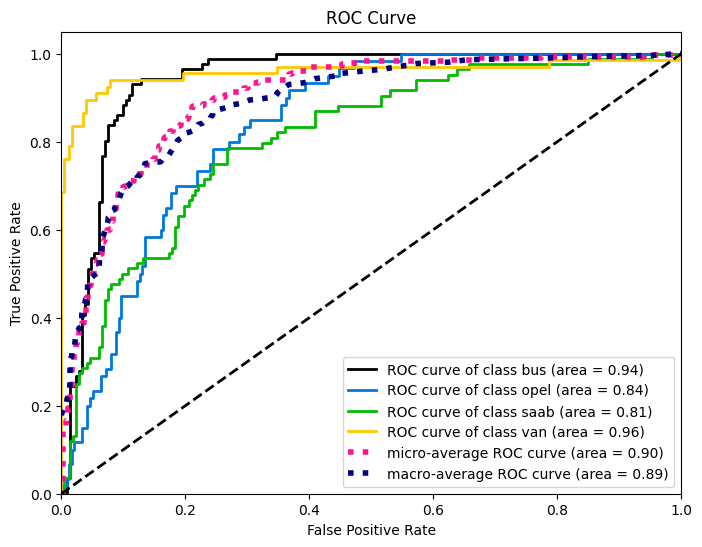

In [131]:
best_model = best_clf.best_estimator_

y_proba = best_model.predict_proba(X_test_scaler)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
scikitplot.metrics.plot_roc(y_test, y_proba, figsize=(8, 6))
plt.title("ROC Curve")
plt.show()

In [136]:
y_pred = best_clf.predict(X_test_scaler)

accuracy= accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy score = {accuracy}')
print(f'F1 score = {f1}')

Accuracy score = 0.6801346801346801
F1 score = 0.6753646787734291


#### 2.2. PCA: explained variance plot
* Воспользуемся методом главных компонент (PCA) для нахождения оптимальных параметров. Построим the explaided variance plot.

In [137]:
from sklearn.decomposition import PCA

In [138]:
# функция для отображения объясненной дисперсии и количества сохраннынных компонент
def pca_plot(n_components):
  pca = PCA(n_components=n_components)
  principal_comp = pca.fit_transform(X_train_scaler)
  X_train_pca = pd.DataFrame(data=principal_comp, columns=list(range(pca.n_components_)))

  title = f" {int(n_components * 100)}%" if n_components != None else " 100%"

  explained_variance_ratio = pca.explained_variance_ratio_
  print(f"Explained_variance_ratio{title}: {explained_variance_ratio}")

  # Визуализация объясненной дисперсии
  plt.figure(figsize=(10, 6))
  plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
  plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--', label='Cumulative Explained Variance', color='red')
  plt.xlabel('Principal Component Index')
  plt.ylabel('Explained Variance Ratio')
  plt.title('Explained Variance by Principal Components'+title)
  plt.legend()
  plt.grid()
  plt.show()

Explained_variance_ratio 100%: [0.36947889 0.1627535  0.11328118 0.09936079 0.09090648 0.08386437
 0.04116341 0.02358645 0.01201955 0.00358538]


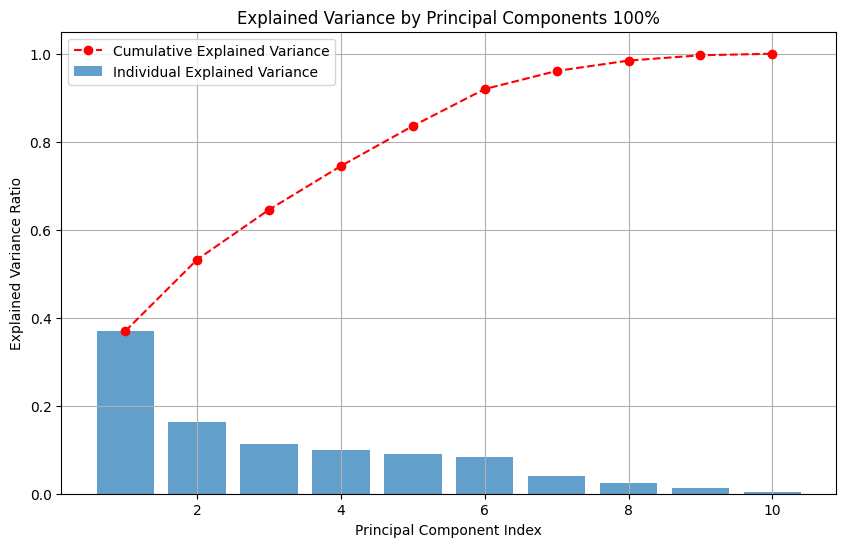

In [139]:
pca_plot(None) # сохраняем количество компонент

Как мы видим на графике, выше отметки в 90% от всей дисперсии компоненты вносят достаточно незначительный вклад в общую дисперсию

Оставим такое количество компонент, чтобы сохранялось 90%, 95% и 100% от всей дисперсии. Для также построим график для n_components равным 0.95 и 0.9 и посмотрим на результаты.

Explained_variance_ratio 95%: [0.36947889 0.1627535  0.11328118 0.09936079 0.09090648 0.08386437
 0.04116341]


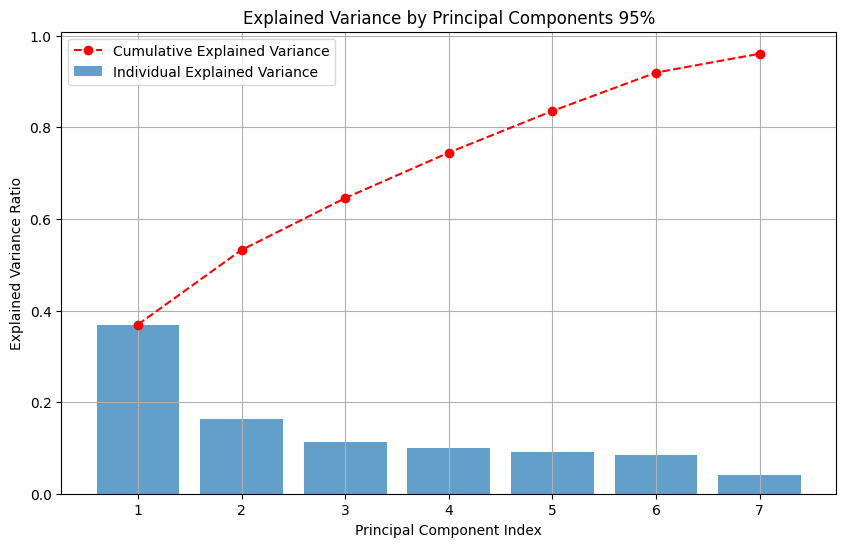

Explained_variance_ratio 90%: [0.36947889 0.1627535  0.11328118 0.09936079 0.09090648 0.08386437]


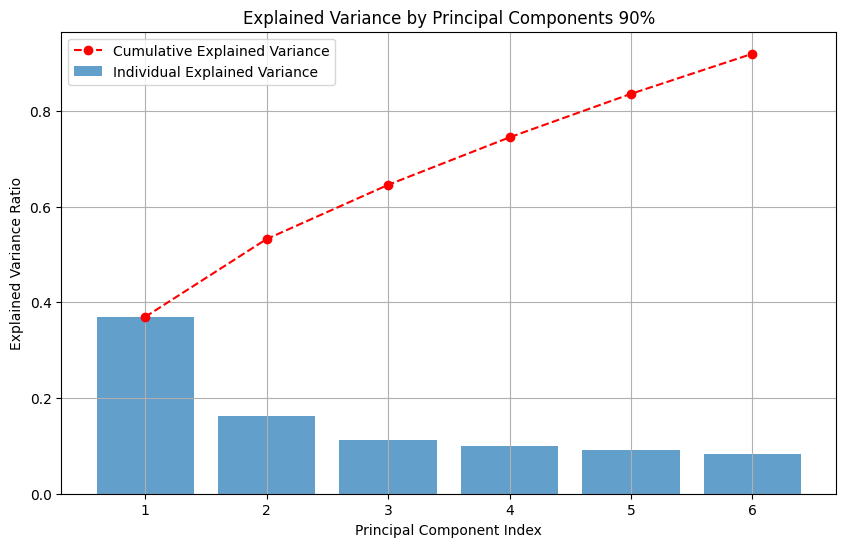

In [140]:
pca_plot(0.95)
pca_plot(0.9)



*   100% дисперсии - 10 компонент
*   95% дисперсии - 7 компонент
*   90% дисперсии - 6 компонент









#### 2.3. PCA trasformation
* Выберем оптимальное число компонент, сравнив качество моделей для каждого из случаев

#### 2.4. Logistic regression on PCA-preprocessed data.
* Обучим модель логичстической регрессии на преобразованных с помощью PCA тренировочной и тестовой выборках

* Оценим качество моделей с помощью метрик f1-score и accuracy с использованием кросс-валидации
* Построим ROC-кривую полученной модели с использованием библиотеки `scikitplot`(e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).ression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score

In [142]:
def pca_quality(n_components):
  estimators = [('pca', PCA(n_components=n_components)), ('logreg', LogisticRegression(multi_class='multinomial'))]
  pipe = Pipeline(estimators)

  pipe.fit(X_train_scaler, y_train)
  y_pred = pipe.predict(X_test_scaler)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average = 'macro')

  n_features = pipe.named_steps['pca'].n_components_
  print(f'Количество признаков: {n_features}')
  print(f'Accuracy score = {accuracy}')
  print(f'F1 score = {f1}')

### PCA, 90% дисперсии

In [143]:
pca_quality(0.9)

Количество признаков: 6
Accuracy score = 0.42424242424242425
F1 score = 0.42184528434528434


### PCA, 95% дисперсии

In [144]:
pca_quality(0.95)

Количество признаков: 7
Accuracy score = 0.5993265993265994
F1 score = 0.5878882794114612


### PCA, 100% дисперсии

In [145]:
pca_quality(None)

Количество признаков: 10
Accuracy score = 0.6868686868686869
F1 score = 0.6800671662648918


Как мы можем заметить, после применения PCA при сохранении количества фич качество немного улучшилось. Однако, при уменьшении количества компонент качество сильно падает, поэтому принято решение - применить PCA, но количество фичей оставить неизменным.


Найдем оптимальные параметры для данных, преобразованных с помощью PCA

In [147]:
X_train_pca = PCA(n_components=None).fit_transform(X_train_scaler)
best_clf = clf.fit(X_train_pca,y_train)
logreg_params = clf.best_params_
# logreg_params = {"C":1.623776739188721, "max_iter":1000,
#                    "multi_class":'multinomial', "penalty":'l1', "solver":'saga'}
best_clf.best_estimator_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


LogisticRegression(C=0.615848211066026, l1_ratio=0.25, max_iter=1000,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')

Оптимальные параметры для нашей модели логичстической регрессии на данных PCA:

*   LogisticRegression(C=0.615848211066026, l1_ratio=0.25, max_iter=1000, multi_class='multinomial', penalty='elasticnet', solver='saga')



In [149]:
logreg_params = best_clf.best_params_
print('accuracy: ', best_clf.score(X_test_pca, y_test))

accuracy:  0.6835016835016835


<Figure size 800x600 with 0 Axes>

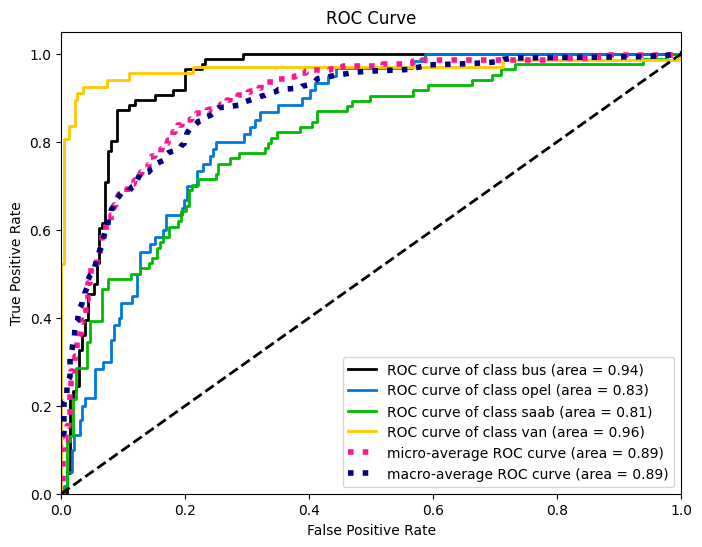

In [150]:
estimators = [('pca', PCA(n_components=None)), ('logreg', LogisticRegression(**logreg_params))]
pipe = Pipeline(estimators)

pipe.fit(X_train_scaler, y_train)

y_proba = pipe.predict_proba(X_test_scaler)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
scikitplot.metrics.plot_roc(y_test_pd, y_proba, figsize=(8, 6))
plt.title("ROC Curve")
plt.show()

#### 2.5. Decision tree
* Обучим модель решающего дерева на таких же данных. Найдем оптимальную глубину решающего дерева (`max_depth`) с использованием кросс-валидации

* Оценим качество полученной модели с помощью метрик, используемых выше

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

tree.fit(X_train_scaler, y_train)
y_pred = tree.predict(X_test_scaler)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy score = {accuracy}')
print(f'F1 score = {f1}')

Accuracy score = 0.6397306397306397
F1 score = 0.6332641639942149


In [153]:
pipe = Pipeline([
      ('pca', PCA(n_components=None)),  # Опционально: PCA (можно убрать)
      ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=42))  # Дерево решений
  ])

In [154]:
pipe.fit(X_train_scaler, y_train)
y_pred = pipe.predict(X_test_scaler)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy score = {accuracy}')
print(f'F1 score = {f1}')

Accuracy score = 0.6531986531986532
F1 score = 0.6476767353175976


In [155]:
param_grid = [{'max_depth':list(range(1, X_train.shape[0]))}]

In [156]:
clf = GridSearchCV(tree, param_grid = param_grid, cv = 5, verbose=1, n_jobs=-1)
clf

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             verbose=1)

In [157]:
best_clf = clf.fit(X_train_scaler,y_train)
best_clf.best_estimator_

Fitting 5 folds for each of 548 candidates, totalling 2740 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=42)

In [158]:
X_train_pca = PCA(n_components=None).fit_transform(X_train_scaler)
best_clf = clf.fit(X_train_pca,y_train)
best_clf.best_estimator_

Fitting 5 folds for each of 548 candidates, totalling 2740 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=42)

Оптимальная глубина для нашего решающего дерева на данных PCA равна 9

In [159]:
tree_params = best_clf.best_params_
print('accuracy: ', best_clf.score(X_test_pca, y_test))


accuracy:  0.6531986531986532


#### 2.6. Бэггинг (Bagging)
Здесь начинается часть, посвященная ансамблям.

Сначала мы используем подход бэггинг (Bagging). Построим ансамбль из
N
алгоритмов, изменяя
N от
Nmin
 = 2 до
Nmax
=
100 с шагом 5.

Мы построим два ансамбля: из логистических регрессий и из решающих деревьев.

Комментарий: каждый ансамбль должен состоять из моделей одного типа, то есть логистические регрессии не следует смешивать с решающими деревьями.

Чтобы эффективно построить ансамбль бэггинга с изменяемым размером ансамбля, мы можем один раз сгенерировать
Nmax
  подмножеств данных train (того же размера, что и исходный набор данных), используя процедуру бутстрэпа. Затем мы обучаем новый экземпляр логистической регрессии/решающего дерева с оптимальными гиперпараметрами, которые мы оценили ранее, на каждом подмножестве (то есть обучаем модель с нуля). Наконец, чтобы получить ансамбль из
N моделей, вы усредняете предсказания
N моделей из
N max
 .

Далее построим графики показателей f1 и accuracy в зависимости от размера ансамбля.

Задачи:

1. Кратко проанализировать график и найти оптимальное количество алгоримов

In [160]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score

In [161]:
import warnings
warnings.filterwarnings("ignore")

In [164]:
y_train_pd = pd.DataFrame(y_train)
y_test_pd = pd.DataFrame(y_test)
X_train_pd

,0,1,2,3,4,5,6,14,15,16
0,822,95,41,82,170,65,9,64,4,8
1,486,104,57,103,222,72,12,72,11,12
2,182,91,42,66,169,66,7,67,4,0
3,375,109,52,95,189,58,4,82,0,19
4,528,95,47,73,195,70,7,69,9,19
...,...,...,...,...,...,...,...,...,...,...
544,71,97,59,108,227,70,11,70,10,25
545,106,99,46,105,209,64,11,65,0,33
546,270,82,45,68,150,69,5,80,5,0
547,435,85,37,68,145,60,6,65,3,14


In [177]:
Nmin, Nmax, step = 2, 100, 5  # Количество моделей в ансамбле
num_bootstrap_samples = Nmax   # Количество бутстрап-выборок

bootstrap_samples = [
    resample(X_train_pd, y_train_pd, random_state=None) for i in range(num_bootstrap_samples)
]

def tree_piplane(params):
  if params == False:
    return Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=None)),
      ('tree', DecisionTreeClassifier())
    ])
  if params == True:
    return Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=None)),
      ('tree', DecisionTreeClassifier(**tree_params))
    ])

def logreg_piplane(params):
  if params == False:
    return Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=None)),
      ('logreg', LogisticRegression())
    ])
  if params == True:
    return Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=None)),
        ('logreg', LogisticRegression(**logreg_params))
    ])

# Функция для построения ансамбля
def bagging_ensemble(model_name, params):
    models = []

    if model_name == 'logreg':
        get_pipeline = logreg_piplane
    if model_name == 'tree':
        get_pipeline = tree_piplane

    for X_b, y_b in bootstrap_samples:
      pipeline = get_pipeline(params)
      models.append(pipeline.fit(X_b, y_b))

    # Сохраняем оригинальные названия классов
    class_labels = models[0].named_steps[model_name].classes_

    results = []
    for N in range(Nmin, Nmax + 1, step):
      y_probs = np.mean([m.predict_proba(X_test_pd) for m in models[:N]], axis=0)
      y_preds = class_labels[np.argmax(y_probs, axis=1)]
      acc = accuracy_score(y_test, y_preds)

      f1 = f1_score(y_test, y_preds, average='weighted')
      results.append((N, acc, f1))

    return results

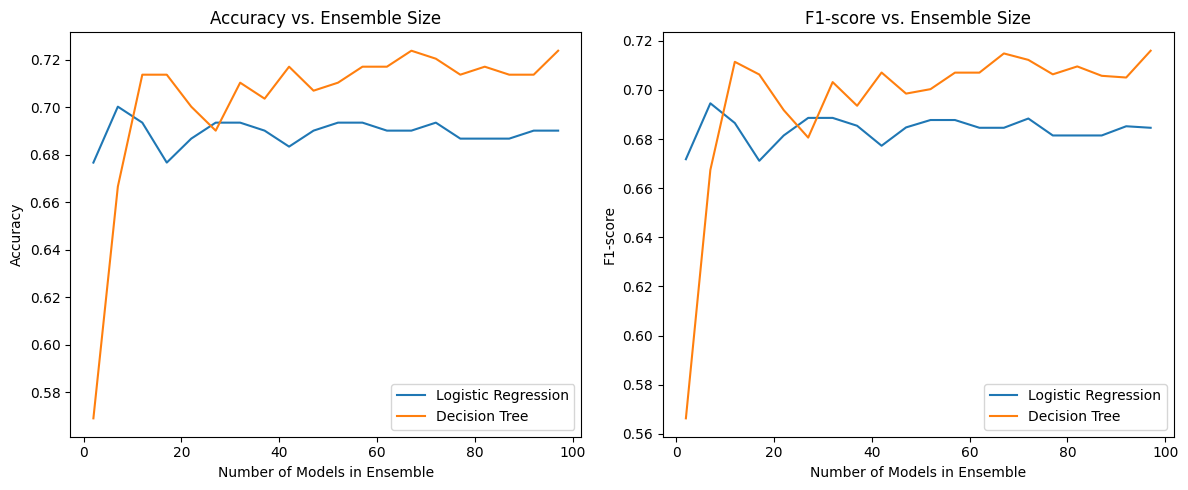

In [178]:
# Берем оптимальные параметры с предыдущих пунктов
logreg_results = bagging_ensemble('logreg', params=True)
tree_results = bagging_ensemble('tree', params=True)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(list(zip(*logreg_results))[0], list(zip(*logreg_results))[1], label="Logistic Regression")
plt.plot(list(zip(*tree_results))[0], list(zip(*tree_results))[1], label="Decision Tree")
plt.xlabel("Number of Models in Ensemble")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs. Ensemble Size")

# F1-score plot
plt.subplot(1, 2, 2)
plt.plot(list(zip(*logreg_results))[0], list(zip(*logreg_results))[2], label="Logistic Regression")
plt.plot(list(zip(*tree_results))[0], list(zip(*tree_results))[2], label="Decision Tree")
plt.xlabel("Number of Models in Ensemble")
plt.ylabel("F1-score")
plt.legend()
plt.title("F1-score vs. Ensemble Size")

plt.tight_layout()
plt.show()

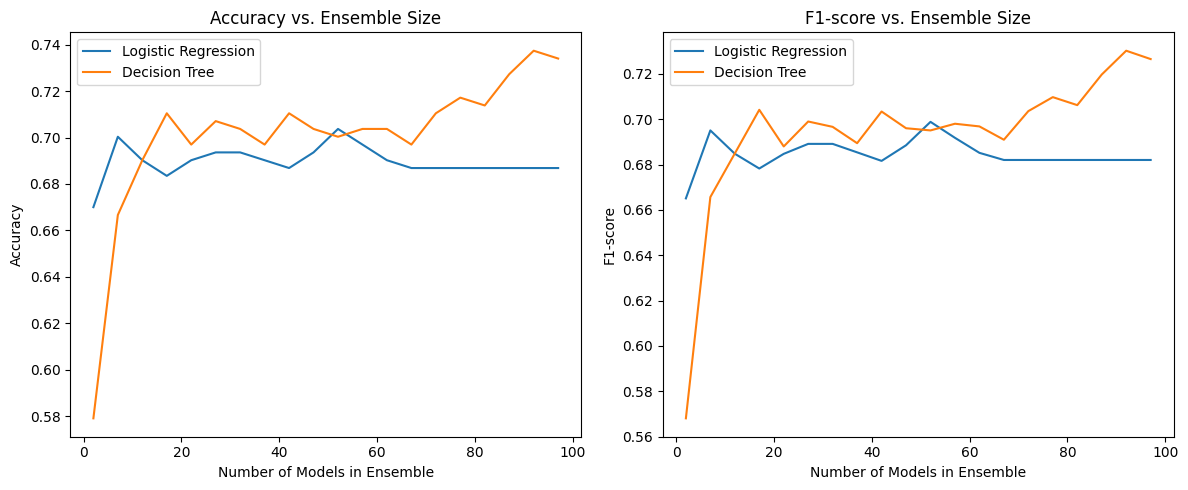

In [180]:
# Параметры по умолчанию
logreg_results = bagging_ensemble('logreg', params=False)
tree_results = bagging_ensemble('tree', params=False)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(list(zip(*logreg_results))[0], list(zip(*logreg_results))[1], label="Logistic Regression")
plt.plot(list(zip(*tree_results))[0], list(zip(*tree_results))[1], label="Decision Tree")
plt.xlabel("Number of Models in Ensemble")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs. Ensemble Size")

# F1-score plot
plt.subplot(1, 2, 2)
plt.plot(list(zip(*logreg_results))[0], list(zip(*logreg_results))[2], label="Logistic Regression")
plt.plot(list(zip(*tree_results))[0], list(zip(*tree_results))[2], label="Decision Tree")
plt.xlabel("Number of Models in Ensemble")
plt.ylabel("F1-score")
plt.legend()
plt.title("F1-score vs. Ensemble Size")

plt.tight_layout()
plt.show()

Вид графиков сильно зависит от начальных выборок, которые берутся случайно бутстрапом.

Что можно отметить:



1.   Качество ансамбля логистических моделей практически не меняется при изменении количества моделей в ансамбле и остается постоянным
2.   Для ансамбля деревьев качество растет, но в среднем в какой-то момент выходит на постоянную полку. В среднем эта полка - 20-25 моделей в ансамбле
3. Ансамбль решающих деревьем дает точность лучше, чем ансамбль логичстических моделей



#### 2.7. Random Forest
Здесь мы работаем с моделью Ranndom Forest (its `sklearn` implementation).

* Обучим и оценим качество модели с помощью f1-score и accuracy

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
param_grid = [
    {'n_estimators':list(range(1, 100, 5)),
}
]

model = RandomForestClassifier(class_weight='balanced', random_state=None)

In [183]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 5, verbose=1, n_jobs=-1)

In [185]:
best_clf = clf.fit(X_train_scaler,y_train_pd)
best_clf.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(class_weight='balanced', n_estimators=61)

In [184]:
best_clf = clf.fit(X_train_pca,y_train_pd)
best_clf.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(class_weight='balanced', n_estimators=91)

In [186]:
pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=None)),
      ('logreg', RandomForestClassifier(n_estimators=91, class_weight='balanced'))
  ])

pipeline.fit(X_train_pd, y_train_pd)
y_pred = pipeline.predict(X_test_pd)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy score = {accuracy}')
print(f'F1 score = {f1}')

Accuracy score = 0.7070707070707071
F1 score = 0.7017857154635995


In [188]:
pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=None)),
      ('logreg', RandomForestClassifier(n_estimators=30, class_weight='balanced'))
  ])

pipeline.fit(X_train_pd, y_train_pd)
y_pred = pipeline.predict(X_test_pd)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy score = {accuracy}')
print(f'F1 score = {f1}')

Accuracy score = 0.7037037037037037
F1 score = 0.6983705280904204


In [189]:
pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=None)),
      ('logreg', RandomForestClassifier(n_estimators=5, class_weight='balanced'))
  ])

pipeline.fit(X_train_pd, y_train_pd)
y_pred = pipeline.predict(X_test_pd)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy score = {accuracy}')
print(f'F1 score = {f1}')

Accuracy score = 0.6430976430976431
F1 score = 0.6355446892910447


Как можнло увидеть, для найденного оптимального количества моделей в ансамбле (91) качество правктически не отличается от качества предсказаний ансамбля из 30 меделей, но сильно отличается от качества ансамбля с 5 моделями, что в целом подтверждает наш вывод о выходе качества на "полку"

#### 2.8. Learning curve
Наша цель на данном этапе - оценить, как меняется поведение модели с увеличением размера тренировочных данных.

* Разделим обучающие данные на 10 равных (почти) частей. Затем обучите модели из приведенных выше (логистическая регрессия, дерево выбора, случайный лес) с оптимальными гиперпараметрами, которые вы выбрали для 1 части, 2 частей (объединив их, чтобы размер цепочки увеличился в 2 раза), 3 частей и так далее.

* Построим график оценок "accuracy" и "f1" для тестовой выборки, изменяя размер тренировочных данных

* Проанализируем результаты

In [214]:
def learninig_curve(model_name, model):
  part_size = X_train_pd.shape[0] // 10
  train_sizes = [i * part_size for i in range(1,9)]

  accuracy_scores = []
  f1_scores = []

  def get_pipeline(model_name, model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=None)),
        (model_name, model),
        ])

  for train_size in train_sizes:
    X_train = X_train_pd[:train_size]
    y_train = y_train_pd[:train_size]

    pipe = get_pipeline(model_name, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test_pd)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

  plt.plot(train_sizes, accuracy_scores, label='Accuracy')
  plt.plot(train_sizes, f1_scores, label='F1 Score')
  plt.xlabel('Train Dataset Size')
  plt.ylabel('Score')
  plt.title(f'Learning Curve {model_name}')
  plt.legend()
  plt.show()

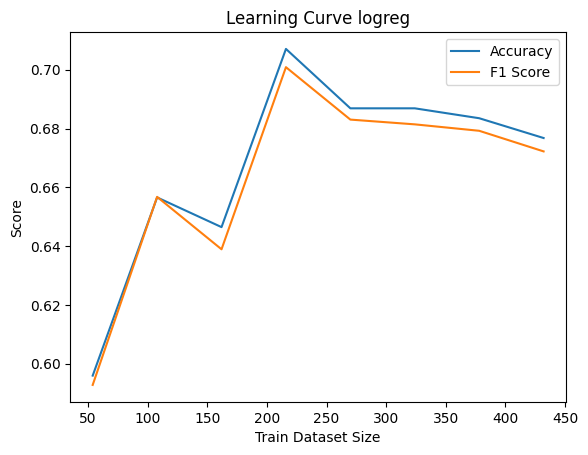

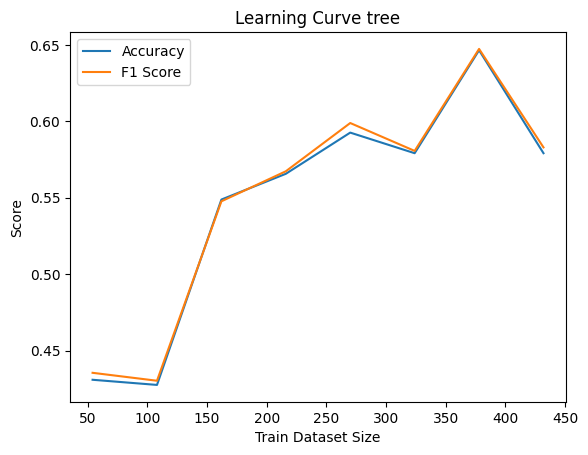

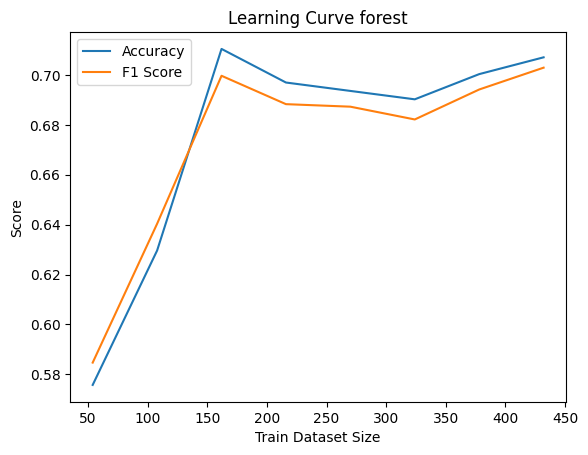

In [220]:
log_model = LogisticRegression(**logreg_params)
tree_model = DecisionTreeClassifier(**tree_params)
forest_model = RandomForestClassifier(n_estimators=91, class_weight='balanced')

learninig_curve('logreg', log_model)
learninig_curve('tree', tree_model)
learninig_curve('forest', forest_model)

Вывод: качество всех моделей (в среднем) значительно растет при увеличении размера тренировочной выборки. Но при изменении параметров графики все еще сильно меняются